<a href="https://colab.research.google.com/github/gabriela-148/IDS/blob/main/HW4/Problem1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gabriella Huegel**

**Project 4 Report**


**CSC346**


**10/26/23**
# Problem 1 - R

In this project, I used Google Colab to execute all the R code I wrote. I also referenced the Portuguese_Bank_R Jupyter notebook within the IDS repository in GitHub.

First, I imported the readr library so I could read the CSV file into a data frame in R. I named the data frame trainingDF because the data we are dealing with covers adult training. Then, I had it display a summary of the table to ensure the correct data was imported.

In [ ]:
# install libraries
install.packages("Hmisc")
library(Hmisc)
library(readr)

# Read CSV int DF
trainingDF <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv", show_col_types = FALSE)

# Check if all data is correct
summary(trainingDF)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




      age         workclass           education     marital-status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

Then, I started to clean up the dataset. I first tried using the is.na function to test if there were any NA or null values. However when examining the data, I noticed that the dataset does not contain many numeric values, but categoric values. Given this, when I was cleansing the data I had to replace missing values with the mode for each column instead of the average, which is the standard procedure for numeric columns.

There is not a built in mode function in R so I had to create my own function which I named mymode. Then, I went through each column and replace the '?' with NA. I replace the values first with NA so it is easier to replace the NA with the mode later in the cell.  

In [ ]:
#own mode function
mymode <- function(v) {
   uniqv <- unique(v)

   uniqv[{which.max(tabulate(match(v, uniqv)))}]
}

# Replace all "?" with NA
trainingDF$education <- ifelse(trainingDF$education == "?", yes=NA, no = trainingDF$education)
trainingDF$workclass <- ifelse(trainingDF$workclass == "?", yes = NA, no = trainingDF$workclass)
trainingDF$age <- ifelse(trainingDF$age == "?", yes = NA, no = trainingDF$age)
trainingDF$income <- ifelse(trainingDF$income == "?", yes = NA, no = trainingDF$income)
trainingDF$sex <- ifelse(trainingDF$sex == "?", yes = NA, no = trainingDF$sex)
trainingDF$occupation <- ifelse(trainingDF$occupation == "?", yes = NA, no = trainingDF$occupation)
trainingDF$`marital-status` <- ifelse(trainingDF$`marital-status` == "?", yes = NA, no = trainingDF$`marital-status`)
trainingDF$`capital-gain` <- ifelse(trainingDF$`capital-gain` == 99999, yes = NA, no = trainingDF$`capital-gain`)
trainingDF$`capital-gain` <- ifelse(trainingDF$`capital-gain` == "?", yes = NA, no = trainingDF$`capital-gain`)
trainingDF$`capital-loss` <- ifelse(trainingDF$`capital-loss` == "?", yes = NA, no = trainingDF$`capital-loss`)

# Imputes the average for numeric values where it is NA, or the mode if the column is categorical
trainingDF$education <- with(trainingDF, impute(education, mean))
trainingDF$workclass <- with(trainingDF, impute(workclass, mymode(trainingDF$workclass)))
trainingDF$age <- with(trainingDF, impute(age, mean))
trainingDF$income <- with(trainingDF, impute(income, mean))
trainingDF$sex <- with(trainingDF, impute(sex, mymode(trainingDF$sex)))
trainingDF$occupation <- with(trainingDF, impute(occupation, mymode(trainingDF$occupation)))
trainingDF$`marital-status` <- with(trainingDF, impute(`marital-status`, mymode(trainingDF$`marital-status`)))
trainingDF$`capital-gain` <- with(trainingDF, impute(`capital-gain`, mymode(trainingDF$`capital-gain`)))
trainingDF$`capital-loss` <- with(trainingDF, impute(`capital-loss`, mymode(trainingDF$`capital-loss`)))

# Prints sum of NA in whole DF to check if all NAs were replaced
cat("Sum of NA: ", sum(is.na(trainingDF)))

Sum of NA:  0

Next, I created a contingency table between workclass and sex to examine their relationship, if there is one.

In [ ]:
r_crosstab <- table(trainingDF$workclass, trainingDF$sex)

ftable(r_crosstab)

                  Female Male
                             
Federal-gov          149  305
Local-gov            377  592
Never-worked           1    4
Private             3951 7159
Self-emp-inc          54  444
Self-emp-not-inc     178  992
State-gov            201  385
Without-pay            1    4

From this result we can conclude that there are more males in government than females and in general there are more males involed in this data than females. Since there is no background information given on these attributes along with the dataset, I can only assume about the relationships between two attributes.

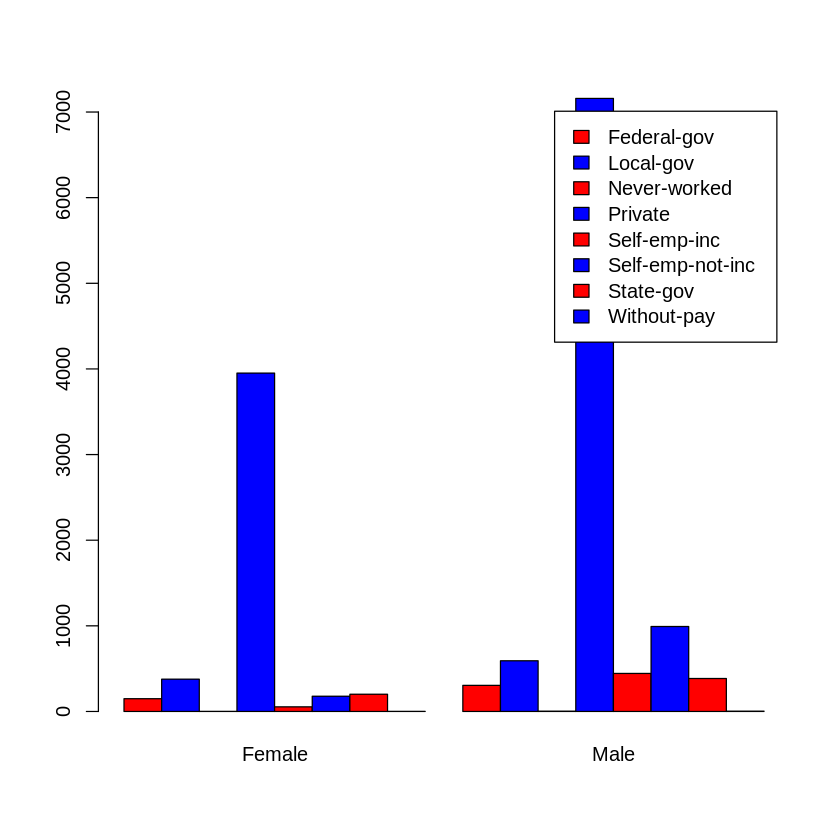

In [ ]:
# Plot all columns

barplot(as.matrix(r_crosstab), beside = TRUE, legend.text = TRUE, col = c("red", "blue"))


Then, I created a contingency table between sex and marital status.

In [ ]:
r_crosstab <- table(trainingDF$sex, trainingDF$`marital-status`)

ftable(r_crosstab)

        Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                                           
Female      1219                 7                761                    95          2160       290     380
Male         795                 4               6010                   104          2717       182      73

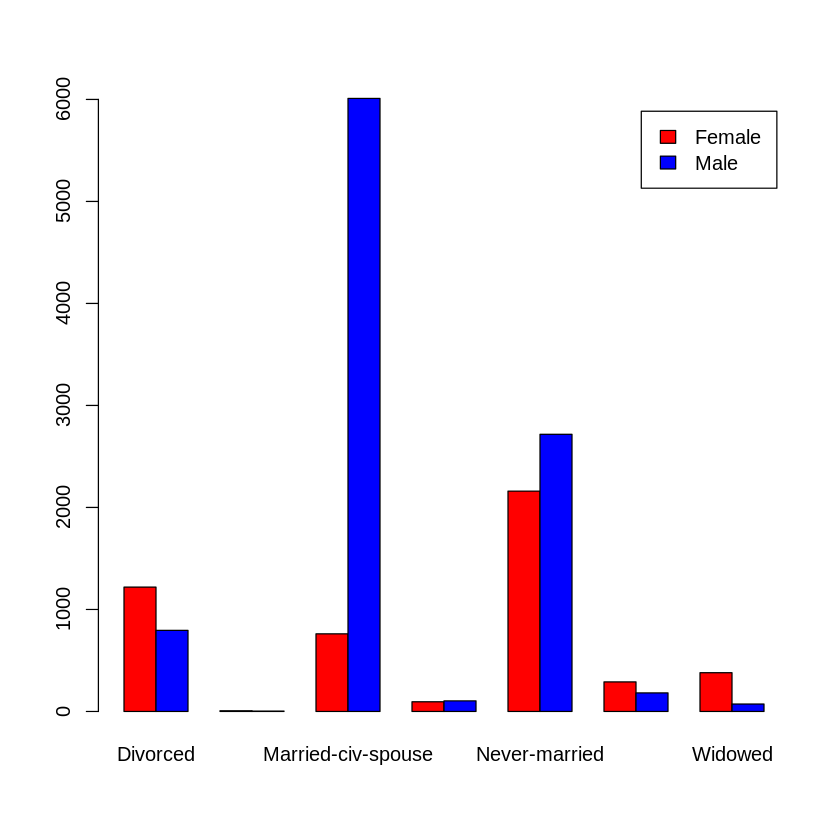

In [ ]:
# Plot all columns

barplot(as.matrix(r_crosstab), beside = TRUE, legend.text = TRUE, col = c("red", "blue"))

From this table, I can see that more males are married in this dataset than women. And, more divorced women were a part of the data collection than divorced men. Since there is no background information given on these attributes along with the dataset, I can only assume about the relationships between two attributes.

In order to identify outliers in this dataset, I need to scale the columns to identify a normal distribution of data. In this case, I used the education column to identify outliers so I used the scale function, which uses a standard scaler.

In [ ]:
trainingDF$scaled_edu <- scale(x = trainingDF$education)
summary(trainingDF$scaled_edu)

       V1          
 Min.   :-3.49029  
 1st Qu.:-0.41135  
 Median :-0.02648  
 Mean   : 0.00000  
 3rd Qu.: 0.74326  
 Max.   : 2.28273  

From this information, I can apply the 3 standard deviation rule which states that any values greater than 3 or -3 will be considered outliers for the dataset. To apply this rule here, I checked to see if each value in the education column is greater than 3 or -3 and then I printed out the sum of the amount of the outliers.

In [ ]:
devRule <- (trainingDF$scaled_edu > 3 | trainingDF$scaled_edu < -3)
# how many outliers are there?
cat ("There are", sum(devRule), "outliers \n\n")

There are 113 outliers 



Then, I applied the same process with the education outliers to the age column. First, I scaled the column.

In [ ]:
trainingDF$scaled_age <- scale(x = trainingDF$age )
summary(trainingDF$scaled_age)

       V1         
 Min.   :-1.5855  
 1st Qu.:-0.7813  
 Median :-0.1234  
 Mean   : 0.0000  
 3rd Qu.: 0.6808  
 Max.   : 3.7512  

The only difference in this process is that I identified the most extreme outlier for this attirbute. In order to do this, I had to find the maximum and minimum values of the scaled values and take the absolute value. I did this because the most extreme outlier could either be positive or negative so I need to check the absolute value of the max and minimum.

In [ ]:
devRule2 <- (trainingDF$scaled_age > 3 | trainingDF$scaled_age < -3)
# how many outliers are there?
cat ("There are", sum(devRule2), "outliers \n\n")

# Find the maximum and minimum values of the 'scaled_age' column
maxOutlier <- max(trainingDF$scaled_age, na.rm = TRUE)
minOutlier <- min(trainingDF$scaled_age, na.rm = TRUE)

# Gets abs value of each outlier to determine which is larger
if (abs(maxOutlier - 0) > abs(0 - minOutlier)) {
  cat(maxOutlier)
} else {
  cat(minOutlier)
}


There are 60 outliers 

3.751227

I created a new dataframe called adultsOver80 which only contains data where the age is greater than 80.

In [ ]:
#Adults over 80
adultsOver80 <- subset(trainingDF, age >= 80)

adultsOver80

age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,scaled_edu,scaled_age
<dbl>,<impute>,<dbl>,<chr>,<impute>,<chr>,<dbl>,<dbl>,<chr>,"<dbl[,1]>","<dbl[,1]>"
90,Private,9,Never-married,Other-service,Male,0,2206,<=50K,-0.41134550,3.751227
80,Private,9,Widowed,Prof-specialty,Male,0,0,<=50K,-0.41134550,3.020173
90,Private,9,Never-married,Other-service,Female,0,0,<=50K,-0.41134550,3.751227
88,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K,1.89785947,3.605016
90,Private,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,1.12812448,3.751227
90,Private,10,Never-married,Other-service,Male,0,0,<=50K,-0.02647801,3.751227
82,Private,4,Widowed,Prof-specialty,Male,0,0,<=50K,-2.33568298,3.166384
90,Private,5,Never-married,Adm-clerical,Female,0,0,<=50K,-1.95081548,3.751227
80,Private,14,Widowed,Prof-specialty,Female,0,0,<=50K,1.51299197,3.020173


I created a histogram to display the ages above 80 in this dataset.

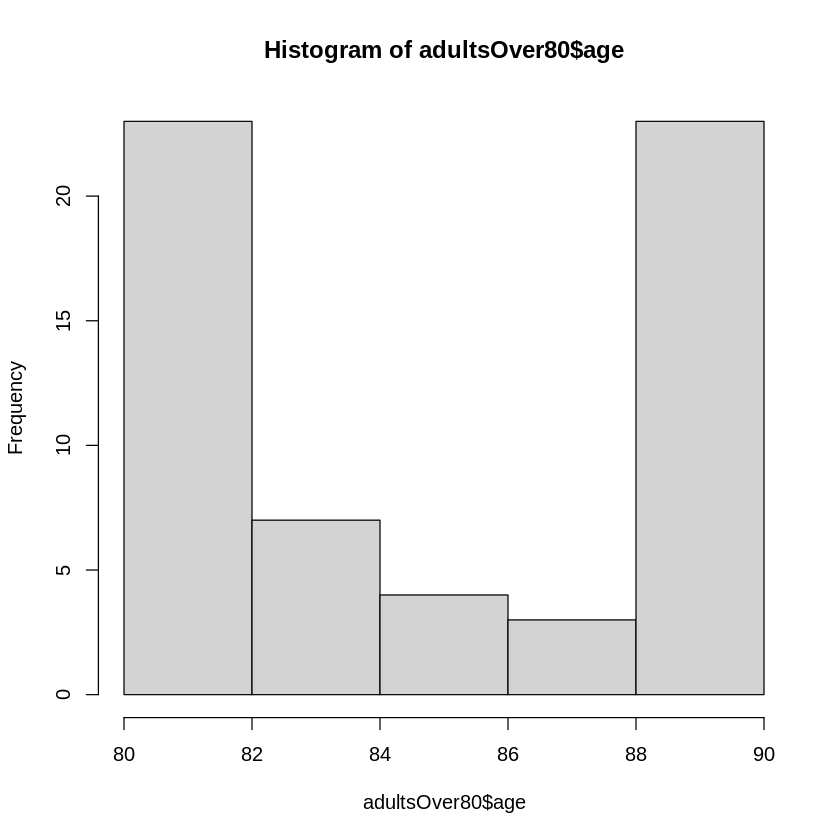

In [ ]:
# Histogram to display frequency of ages
hist(adultsOver80$age)


Given this histogram, I can conclude that most of the data from this age group above 80 came from people from the ages 80-82 and 88-90.

For this analysis, I did not have any context for the data. There was no reference sheet to describe the data or to explain why the data was collected. As I mentioned before, I can only make assumptions about what the data could be interpreted as using common sense.